In [327]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from env import get_db_url
import pydataset

np.random.seed(123)

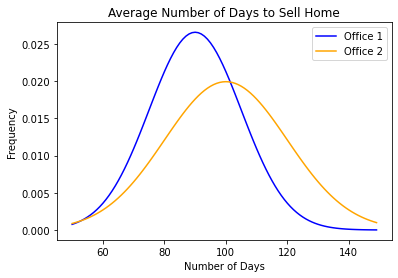

In [20]:
# Choosing the numbers on X axis so it can be visualized
x = np.arange(50, 150)

#
y1 = stats.norm(90, 15).pdf(x)
y2 = stats.norm(100, 20).pdf(x)


plt.plot(x, y1, c='blue', label = 'Office 1')
plt.plot(x, y2, c='orange', label = 'Office 2')


plt.ylabel('Frequency')
plt.xlabel('Number of Days')
plt.title('Average Number of Days to Sell Home')
plt.legend()

# Set Hypothesis

<AxesSubplot:>

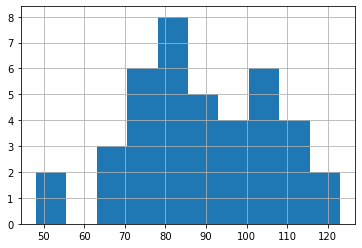

In [21]:
office_1 = pd.Series(stats.norm(90, 15).rvs(40))
office_1.hist()

<AxesSubplot:>

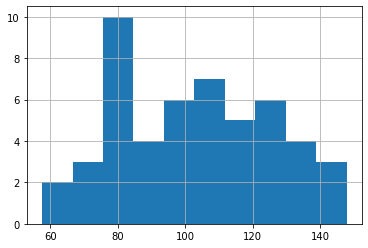

In [22]:
office_2 = pd.Series(stats.norm(100, 20).rvs(50))
office_2.hist()

In [ ]:
# Null - Office 2 mean sale time == office 2 mean sale time
# Alternative - Office 2 mean sale time != office 1 mean sale time 

# Set Alpha

In [25]:
alpha = .05

# Set Assumptions

In [ ]:
# Independent - yes (two office sets)
# Normally distributed - yes (more than 30 samples)
# variances - False

In [13]:
office_1_var = 15 ** 2
office_2_var = 20 ** 2

office_1_var, office_2_var

(225, 400)

In [18]:
# T value will only matter when we are hypothesizing a greater than or less than outome
# t statistic doesnt matter because of the two tail test/hypothesis
# P value is most important right now because we want to confirm our hypothesis


t, p = stats.ttest_ind_from_stats(100, 20, 50, 90, 15, 40, equal_var=False)
t, p

(2.7091418459143854, 0.00811206270346016)

# Conclusion

In [26]:
# Check if the p < alpha

if (p < alpha):
    print('We will reject the Null Hypothesis')

We will reject the Null Hypothesis


# QUESTION 2

In [2]:
from pydataset import data

In [387]:
mpg = data('mpg')
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [388]:
mpg['fuel_efficiency'] = (mpg.hwy + mpg.cty) / 2
mpg['fuel_efficiency']

1      23.5
2      25.0
3      25.5
4      25.5
5      21.0
       ... 
230    23.5
231    25.0
232    21.0
233    22.0
234    21.5
Name: fuel_efficiency, Length: 234, dtype: float64

In [389]:
fe_cars_2008 = mpg[mpg.year == 2008].fuel_efficiency
fe_cars_2008.head()

3     25.5
4     25.5
7     22.5
10    24.0
11    23.0
Name: fuel_efficiency, dtype: float64

In [390]:
fe_cars_1999 = mpg[mpg.year == 1999].fuel_efficiency
fe_cars_1999.head()

1    23.5
2    25.0
5    21.0
6    22.0
8    22.0
Name: fuel_efficiency, dtype: float64

<AxesSubplot:>

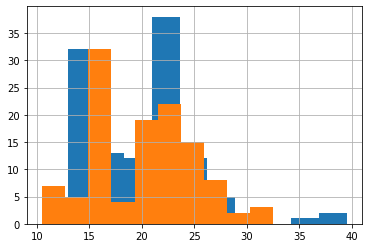

In [391]:
fe_cars_1999.hist()
fe_cars_2008.hist()

In [122]:
fe_cars_1999.count(), fe_cars_2008.count()

(117, 117)

# Set Hypothesis

In [47]:
# Null - 2008 car fuel efficiency == 1999 car fuel efficiency
# Alternative - 2008 car fuel efficiency != 1999 car fuel efficiency

# Set Alpha

In [58]:
alpha = .05

In [59]:
fe_cars_1999.var() , fe_cars_2008.var()

(27.122605363984682, 24.097480106100797)

# Set Assumptions

In [121]:
# Independent - Yes #Two different manufacture years
# Normal - Yes 
# Variance - No # variances are not the same

In [ ]:
# Levene testing to back up variances

# Computing Ttest Statistics

In [61]:
t, p = stats.ttest_ind(fe_cars_2008, fe_cars_1999, equal_var=False)

t, p

(-0.21960177245940962, 0.8263750772060638)

# Decision Making Step

In [64]:
if p < alpha:
    print('We reject the Null Hypothesis')
else:
    print('We fail to reject the Null Hypothesis')
    

We fail to reject the Null Hypothesis


# NUMBER 2.b
Are compact cars more fuel-efficient than the average car?

In [68]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_efficiency
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [ ]:
# Null - compact cars fuel efficiency == overall car fuel efficiency
# Alternate - compact car fuel efficiency > overall car fuel efficiency

In [88]:
alpha = .05

In [392]:
mpg = mpg.rename(columns={'class' : 'class_type'})
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class_type,fuel_efficiency
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [393]:
overall_efficiency = mpg.fuel_efficiency.mean()
overall_efficiency

20.14957264957265

<AxesSubplot:>

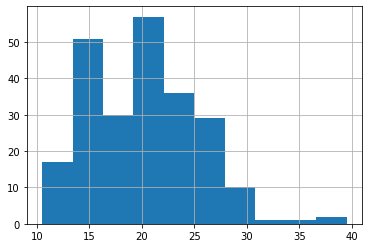

In [394]:
mpg.fuel_efficiency.hist()

In [112]:
compact_efficiency = mpg.fuel_efficiency[mpg.class_type == 'compact']
compact_efficiency.head()

1    23.5
2    25.0
3    25.5
4    25.5
5    21.0
Name: fuel_efficiency, dtype: float64

In [90]:
t, p = stats.ttest_1samp(compact_efficiency, overall_efficiency, alternative = 'greater')
t, p

(7.896888573132535, 2.0992818971585668e-10)

# Decision

In [92]:
if (t > 0) and (p < alpha):
    print('Reject the Null hypothesis')
else:
    print('Do not reject the null hypothesis')

Reject the Null hypothesis


# NUMBER 2.c
Do manual cars get better gas mileage than automatic cars?

# Create Hypothesis

In [111]:
# Null - Manual cars gas mileage == automatic cars gas mileage
# Alternate - Manual cars gas mileage > automatic cars gas mileage

In [118]:
alpha = .05

In [96]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class_type,fuel_efficiency
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [108]:
man_car_fe = mpg[mpg.trans.str.contains('manual')].fuel_efficiency
man_car_fe.head()

2     25.0
3     25.5
6     22.0
8     22.0
10    24.0
Name: fuel_efficiency, dtype: float64

In [106]:
auto_car_fe = mpg[mpg.trans.str.contains('auto')].fuel_efficiency
auto_car_fe.head()

1    23.5
4    25.5
5    21.0
7    22.5
9    20.5
Name: fuel_efficiency, dtype: float64

<AxesSubplot:>

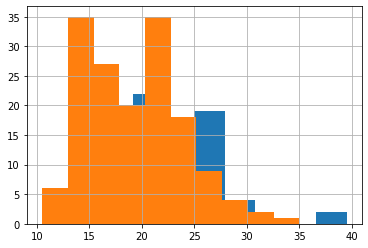

In [109]:
man_car_fe.hist()
auto_car_fe.hist()

In [115]:
man_v = man_car_fe.var()
auto_v = auto_car_fe.var()

man_v, auto_v

(26.635167464114826, 21.942777233382337)

In [125]:
t, p = stats.ttest_ind(man_car_fe , auto_car_fe ,equal_var = False, alternative = 'greater')
t, p/2

(4.443514012903071, 4.488062249979483e-06)

In [120]:
if (t > 0) and (p < alpha):
    print('Reject the Null')
else:
    print('Do not reject the Null')

Reject the Null


# CORRELATION EXERCISES

# SETUP 1.a

In [142]:
df = pd.read_csv("/Users/mrmoon/csv/Cust_Churn_Telco.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


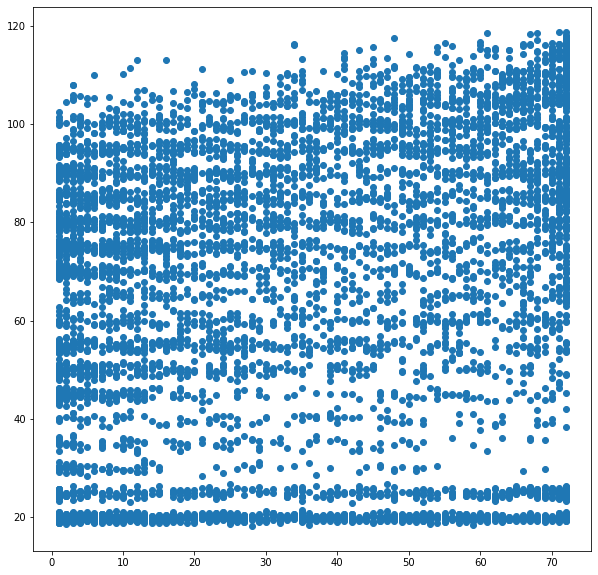

In [173]:
x = df.tenure
y = df.MonthlyCharges

plt.figure(figsize = (10, 10))
           
plt.scatter(x, y)

In [175]:
alpha = .05

# Null Hypothesis -  Correlation with monthly charges and tenure does not exist
# Alternate Hypothesis - There is correlation with tenure and monthly charges

r, p = stats.pearsonr(x, y)
r, p

(0.24686176664089346, 3.9898213232673846e-98)

In [177]:
if p < alpha:
    print ('We reject the Null Hypothesis')

We reject the Null Hypothesis


# Problem 1.b

## SETUP.a

In [178]:
# Checking for empty (nan) values
nan_val = df.isna().any()
nan_val

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [179]:
# Dropping the Nan values and re assigning it to the dataframe
df = df.dropna()

# resetting the nan value after we have dropped the nans 
# retesting the nan
nan_val = df.isna().any()
nan_val

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

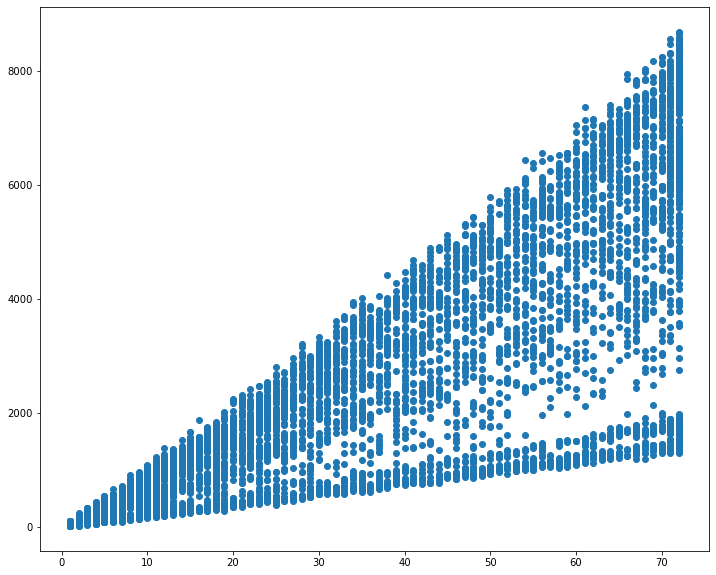

In [182]:
x = df.tenure
y = df.TotalCharges

plt.figure(figsize = (12, 10))
plt.scatter(x, y)

In [183]:
r, p = stats.pearsonr(x, y)
r, p

(0.825880460933202, 0.0)

In [186]:
# BECAUSE P IS LESS THAN ALPHA WE CAN REJECT THE NULL HYPOTHESIS

# PROBLEM 1.c

In [190]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


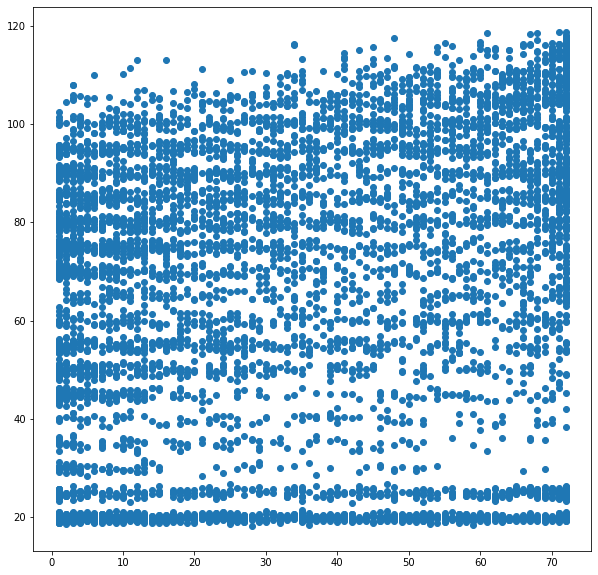

In [193]:
x = df.tenure
y = df.MonthlyCharges

plt.figure(figsize = (10, 10))
           
plt.scatter(x, y)

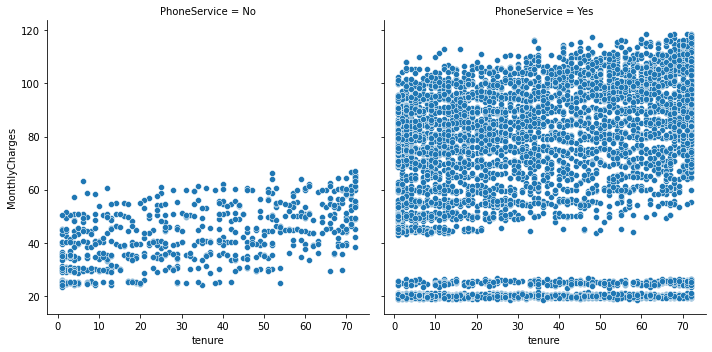

In [191]:
sns.relplot(data = df, y = 'MonthlyCharges', x = 'tenure', col ='PhoneService')

In [205]:
yes_phone = df[df.PhoneService == 'Yes']
no_phone = df[df.PhoneService == 'No']

In [210]:
# NULL - Having a phone has no effect on the linear relationship between monthly charges and tenure
# ALTERNATIVE - Having a phone has an effect on the linear relationship between monthly charges and tenure
r, p = stats.pearsonr(yes_phone.tenure, yes_phone.MonthlyCharges)

print('Has Phone')
print('r = ', r)
print('p = ', p)

Has Phone
r =  0.2441939657519323
p =  6.82801603762022e-87


In [211]:
# NULL - Not having a phone has no effect on the linear relationship between monthly charges and tenure
# ALTERNATIVE - Not having a phone has an effect on the linear relationship between monthly charges and tenure

r, p = stats.pearsonr(no_phone.tenure, no_phone.MonthlyCharges)

print('Has No Phone')
print('r = ', r)
print('p = ', p)

Has No Phone
r =  0.5924298640568983
p =  1.1732739032891168e-65


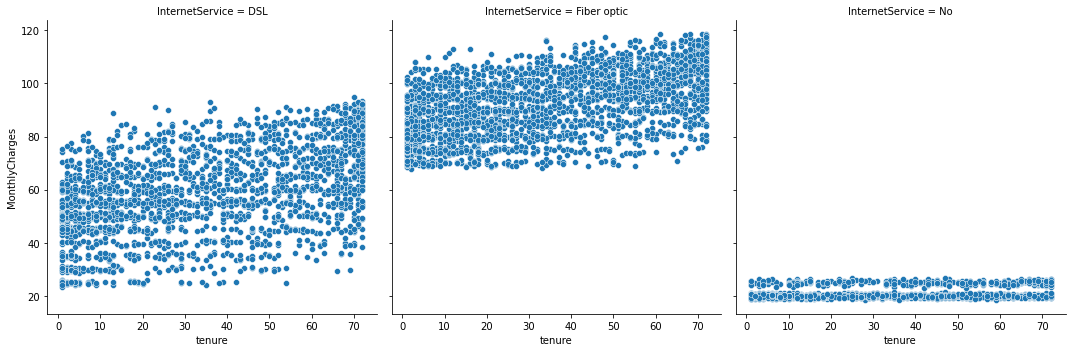

In [192]:
sns.relplot(data = df, y = 'MonthlyCharges', x = 'tenure', col = 'InternetService')

In [238]:
no_internet = df[df.InternetService == 'No']
yes_internet = df[(df.InternetService == 'DSL') | (df.InternetService == 'Fiber optic')]

In [225]:
r, p = stats.pearsonr(no_internet.tenure, no_internet.MonthlyCharges)

print('Has No Internet')
print('r = ', r)
print('p = ', p)

Has No Internet
r =  0.34618773548574655
p =  4.896604599951957e-44


In [239]:
r, p = stats.pearsonr(yes_internet.tenure, yes_internet.MonthlyCharges)

print('Has Internet')
print('r = ', r)
print('p = ', p)

Has Internet
r =  0.3720391976133241
p =  1.6186841401711697e-180


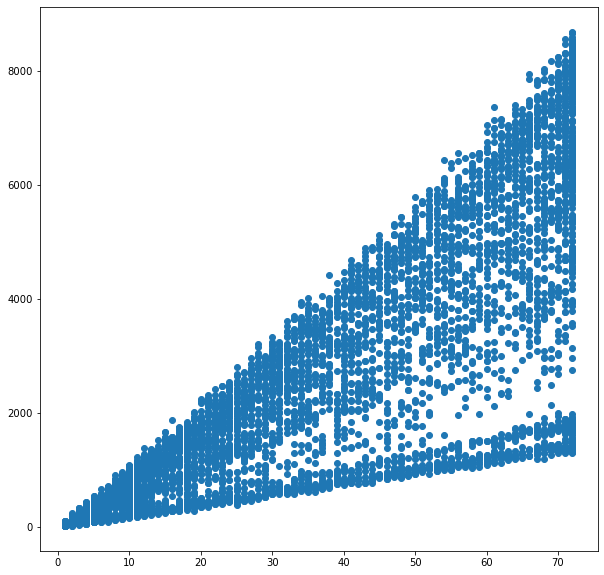

In [194]:
x = df.tenure
y = df.TotalCharges

plt.figure(figsize = (10, 10))
           
plt.scatter(x, y)

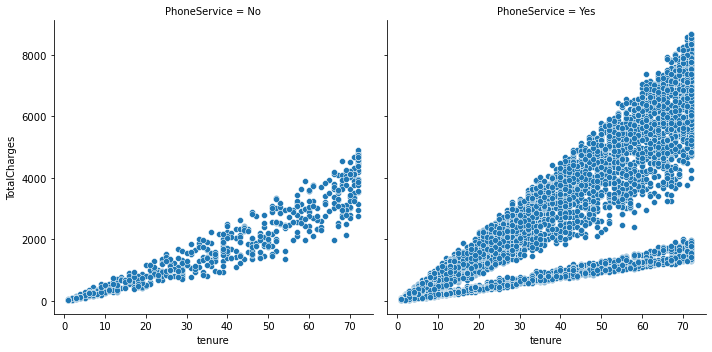

In [204]:
sns.relplot(data = df, y = 'TotalCharges', x = 'tenure', col = 'PhoneService')

# NUMBER 2.a

In [316]:
url = get_db_url('employees')
df = pd.read_sql('''SELECT (dateds.salary, t.to_date, e.hire_date, e.emp_no
FROM employees e
JOIN salaries s
USING (emp_no)

WHERE s.to_date > NOW()
ORDER BY s.salary
''', url)


df

OperationalError: (pymysql.err.OperationalError) (1054, "Unknown column 't.to_date' in 'field list'")
[SQL: SELECT s.salary, t.to_date, e.hire_date, e.emp_no
FROM employees e
JOIN salaries s
USING (emp_no)

WHERE s.to_date > NOW()
ORDER BY s.salary
]
(Background on this error at: https://sqlalche.me/e/14/e3q8)

In [308]:
url = get_db_url('employees')
df = pd.read_sql('''SELECT datediff(curdate(), e.hire_date) as days_employed, s.salary
FROM employees e
JOIN salaries s
USING (emp_no)
JOIN titles t
USING (emp_no)
WHERE t.to_date > NOW()
ORDER BY s.salary DESC
''', url)


df

,days_employed,salary
0,13482,158220
1,13482,157821
2,12982,156286
3,13368,155709
4,12732,155513
...,...,...
2524732,13423,38849
2524733,13273,38836
2524734,10388,38812
2524735,10749,38735


In [317]:
stats.pearsonsr(df.days_employes, df.salary)

AttributeError: module 'scipy.stats' has no attribute 'pearsonsr'

In [277]:
employees_tables = pd.read_sql('show tables', url)
employees_tables

,Tables_in_employees
0,departments
1,dept_emp
2,dept_manager
3,employees
4,salaries
5,titles


In [268]:
# Let's look at all the databases within pd.read_sql and our URL
db_lists = pd.read_sql('SHOW databases', url)
db_lists

,Database
0,albums_db
1,chipotle
2,curriculum_logs
3,elo_db
4,employees
5,fruits_db
6,grocery_db
7,home_credit
8,information_schema
9,innis_1666


In [323]:
sleep = pydataset.data('sleepstudy')
sleep.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [326]:
stats.pearsonr(sleep.Reaction, sleep.Days)

(0.5352302262650253, 9.894096322214812e-15)

In [ ]:
sns.relplot()

# CHI2 EXERCISES

In [ ]:
# Null - There is no association between attrition and departments
# Alternative - There is an association between attritition and departments

In [342]:
alpha = 0.01

In [330]:
df = pd.read_csv("https://gist.githubusercontent.com/ryanorsinger/6ba2dd985c9aa92f5598fc0f7c359f6a/raw/b20a508cee46e6ac69eb1e228b167d6f42d665d8/attrition.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [333]:
df.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [359]:
df.Attrition

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

In [341]:
observed = pd.crosstab(df.Attrition, df.Department)
observed

Department,Human Resources,Research & Development,Sales
Attrition,,,
No,51,828,354
Yes,12,133,92


In [338]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

p

0.004525606574479633

In [339]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[ 51 828 354]
 [ 12 133  92]]
---
Expected

[[ 52 806 374]
 [ 10 154  71]]
---

chi^2 = 10.7960
p     = 0.0045


In [343]:
if p < alpha:
    print("We reject the hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the hypothesis


## Exercise 1.a

In [381]:
# Null - Having a macbook and being a codeup student have no association
# Alternative - Having a macbook and being a codeup student are associated

alpha = .03

In [369]:
codeup_student = 50/100
non_student = 50/100 
use_mac = 69/100
no_mac = 31/100


In [375]:
index = ['use_mac', 'no_mac']
columns = ['codeup_students', 'non_student']

observed = pd.DataFrame ([[49, 20], [1, 30]], index = index, columns = columns)
n = observed.values.sum()


In [377]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[49 20]
 [ 1 30]]
---
Expected

[[34 34]
 [15 15]]
---

chi^2 = 36.6526
p     = 0.0000


In [383]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


## Exercise 2.a

In [400]:
# Null - There is no association between class type and cylinder
# Alternate - There is an association between class type and cylinder

alpha = .03

In [395]:
mpg.head()

mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   manufacturer     234 non-null    object 
 1   model            234 non-null    object 
 2   displ            234 non-null    float64
 3   year             234 non-null    int64  
 4   cyl              234 non-null    int64  
 5   trans            234 non-null    object 
 6   drv              234 non-null    object 
 7   cty              234 non-null    int64  
 8   hwy              234 non-null    int64  
 9   fl               234 non-null    object 
 10  class_type       234 non-null    object 
 11  fuel_efficiency  234 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 23.8+ KB


In [396]:
mpg.nunique()

manufacturer       15
model              38
displ              35
year                2
cyl                 4
trans              10
drv                 3
cty                21
hwy                27
fl                  5
class_type          7
fuel_efficiency    40
dtype: int64

In [358]:
mpg.trans.value_counts()

auto(l4)      83
manual(m5)    58
auto(l5)      39
manual(m6)    19
auto(s6)      16
auto(l6)       6
auto(av)       5
auto(s5)       3
auto(s4)       3
auto(l3)       2
Name: trans, dtype: int64

In [399]:
observed = pd.crosstab(mpg.cyl, mpg.class_type)

observed

class_type,2seater,compact,midsize,minivan,pickup,subcompact,suv
cyl,,,,,,,
4,0,32,16,1,3,21,8
5,0,2,0,0,0,2,0
6,0,13,23,10,10,7,16
8,5,0,2,0,20,5,38


In [401]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[ 0 32 16  1  3 21  8]
 [ 0  2  0  0  0  2  0]
 [ 0 13 23 10 10  7 16]
 [ 5  0  2  0 20  5 38]]
---
Expected

[[ 1 16 14  3 11 12 21]
 [ 0  0  0  0  0  0  1]
 [ 1 15 13  3 11 11 20]
 [ 1 14 12  3  9 10 18]]
---

chi^2 = 138.0282
p     = 0.0000


In [402]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We reject the null hypothesis


## Exercise 3.a

In [403]:
df = data('employees')

Did you mean:
Employment, Unemployment, Males, eagles, EmplUK, polyps, msleep, movies


In [447]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52543 entries, 0 to 52542
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   dept_no     52543 non-null  object
 1   emp_no      52543 non-null  int64 
 2   birth_date  52543 non-null  object
 3   first_name  52543 non-null  object
 4   last_name   52543 non-null  object
 5   gender      52543 non-null  object
 6   hire_date   52543 non-null  object
 7   from_date   52543 non-null  object
 8   to_date     52543 non-null  object
 9   dept_name   52543 non-null  object
dtypes: int64(1), object(9)
memory usage: 4.0+ MB


In [449]:
url = get_db_url('employees')
df = pd.read_sql('''SELECT *
FROM employees e
JOIN dept_emp de
USING (emp_no)
JOIN departments d
USING (dept_no)
JOIN dept_manager dm
USING (dept_no)
WHERE (d.dept_name = 'Sales' OR d.dept_name ='Marketing') AND de.to_date > CURDATE()

''', url)

df.head()

,dept_no,emp_no,birth_date,first_name,last_name,gender,hire_date,from_date,to_date,dept_name,emp_no,from_date,to_date
0,d001,10017,1958-07-06,Cristinel,Bouloucos,F,1993-08-03,1993-08-03,9999-01-01,Marketing,110022,1985-01-01,1991-10-01
1,d001,10058,1954-10-01,Berhard,McFarlin,M,1987-04-13,1988-04-25,9999-01-01,Marketing,110022,1985-01-01,1991-10-01
2,d001,10140,1957-03-11,Yucel,Auria,F,1991-03-14,1991-03-14,9999-01-01,Marketing,110022,1985-01-01,1991-10-01
3,d001,10228,1953-04-21,Karoline,Cesareni,F,1991-08-26,1993-01-28,9999-01-01,Marketing,110022,1985-01-01,1991-10-01
4,d001,10239,1955-03-31,Nikolaos,Llado,F,1995-05-08,1996-05-04,9999-01-01,Marketing,110022,1985-01-01,1991-10-01


In [445]:
df.gender.value_counts(dropna = False)

M    31680
F    20863
Name: gender, dtype: int64

In [446]:
df.dept_name.value_counts()

Sales        37701
Marketing    14842
Name: dept_name, dtype: int64

In [448]:
# Null - Employee gender and department are not associacted
# Alternative - Employee gender and department name are associated

alpha = .05

In [451]:
observed = pd.crosstab(df.gender, df.dept_name)

observed

dept_name,Marketing,Sales
gender,,
F,11728,29998
M,17956,45404


In [453]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[11728 29998]
 [17956 45404]]
---
Expected

[[11786 29939]
 [17897 45462]]
---

chi^2 = 0.6594
p     = 0.4168


In [454]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


## Exercise 3.b

In [465]:
url = get_db_url('employees')
df = pd.read_sql('''SELECT *
FROM employees e
JOIN dept_manager dm
USING (emp_no)
JOIN departments
USING (dept_no)

''', url)

df.head()

,dept_no,emp_no,birth_date,first_name,last_name,gender,hire_date,from_date,to_date,dept_name
0,d009,111692,1954-10-05,Tonny,Butterworth,F,1985-01-01,1985-01-01,1988-10-17,Customer Service
1,d009,111784,1956-06-14,Marjo,Giarratana,F,1988-02-12,1988-10-17,1992-09-08,Customer Service
2,d009,111877,1962-10-18,Xiaobin,Spinelli,F,1991-08-17,1992-09-08,1996-01-03,Customer Service
3,d009,111939,1960-03-25,Yuchang,Weedman,M,1989-07-10,1996-01-03,9999-01-01,Customer Service
4,d005,110511,1957-07-08,DeForest,Hagimont,M,1985-01-01,1985-01-01,1992-04-25,Development


In [467]:
df.gender.value_counts()

F    13
M    11
Name: gender, dtype: int64

In [466]:
observed = pd.crosstab(df.gender, df.dept_name)

observed

dept_name,Customer Service,Development,Finance,Human Resources,Marketing,Production,Quality Management,Research,Sales
gender,,,,,,,,,
F,3,1,1,2,0,2,3,1,0
M,1,1,1,0,2,2,1,1,2


In [468]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[3 1 1 2 0 2 3 1 0]
 [1 1 1 0 2 2 1 1 2]]
---
Expected

[[2 1 1 1 1 2 2 1 1]
 [1 0 0 0 0 1 1 0 0]]
---

chi^2 = 7.8881
p     = 0.4445


In [469]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis
